In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [43]:
breast_cancer = load_breast_cancer()

In [44]:
X = breast_cancer.data
y = breast_cancer.target

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [3]:
def predict(w,x):
    weighted_sum=np.dot(x, w[1:]) + w[0]
    if weighted_sum >= 0:
        return 1
    else:
        return 0    


In [4]:
def perceptron_train(X, y, learning_rate, epochs):
    num_features = X.shape[1]
    weights = np.random.uniform(-1, 1, num_features + 1)  # Add one for bias
    
    for epoch in range(epochs):
        for i in range(X.shape[0]):
            y_pred = predict(weights, X[i])
            weights[1:] += learning_rate * (y[i] - y_pred) * X[i]
            weights[0] += learning_rate * (y[i] - y_pred)  # Update bias separately
    return weights

In [5]:
learning_rates = [0.01, 0.05, 0.1]
epochs_list = [50, 100, 150]

In [6]:
plt.figure(figsize=(35, 10))
i = 1

<Figure size 3500x1000 with 0 Axes>

In [7]:

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for lr in learning_rates:
    for epochs in epochs_list:
        weights = perceptron_train(X_train, y_train, lr, epochs)
        y_pred = np.array([predict(weights, X_test[i]) for i in range(X_test.shape[0])])
        
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        accuracy_scores.append(acc)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        
        print(f'learning_rate={lr}, epochs={epochs}, accuracy={acc}, precision={precision}, recall={recall}, f1={f1}')
      

learning_rate=0.01, epochs=50, accuracy=0.9649122807017544, precision=0.9658276125095346, recall=0.9649122807017544, f1=0.965060378218273
learning_rate=0.01, epochs=100, accuracy=0.956140350877193, precision=0.958041683492619, recall=0.956140350877193, f1=0.9564062528806049
learning_rate=0.01, epochs=150, accuracy=0.9385964912280702, precision=0.9390179995443153, recall=0.9385964912280702, f1=0.9387316420177368
learning_rate=0.05, epochs=50, accuracy=0.9649122807017544, precision=0.9649122807017544, recall=0.9649122807017544, f1=0.9649122807017544
learning_rate=0.05, epochs=100, accuracy=0.9736842105263158, precision=0.9739576213260425, recall=0.9736842105263158, f1=0.973742132293316
learning_rate=0.05, epochs=150, accuracy=0.9649122807017544, precision=0.9658276125095346, recall=0.9649122807017544, f1=0.965060378218273
learning_rate=0.1, epochs=50, accuracy=0.9736842105263158, precision=0.9739576213260425, recall=0.9736842105263158, f1=0.973742132293316
learning_rate=0.1, epochs=100, 

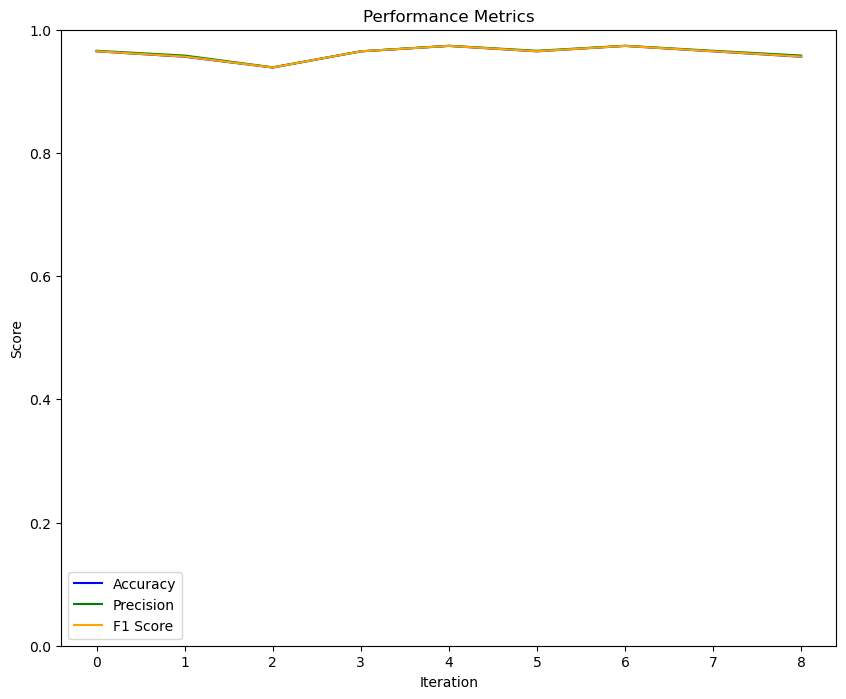

In [8]:
fig, axs = plt.subplots(figsize=(10, 8))

# Plot accuracy
axs.plot(accuracy_scores, label='Accuracy', color='blue')

# Plot precision
axs.plot(precision_scores, label='Precision', color='green')

# Plot recall
# axs.plot(recall_scores, label='Recall', color='red')

# Plot F1 score
axs.plot(f1_scores, label='F1 Score', color='orange')

# Set the title, x-axis label, and y-axis label
axs.set_title('Performance Metrics')
axs.set_xlabel('Iteration')
axs.set_ylabel('Score')

# Set the y-axis limits
axs.set_ylim([0, 1])

# Add a legend
axs.legend()

# Show the plot
plt.show()